<a href="https://colab.research.google.com/github/Vaibhav-Dangar/YES_BANK_STOCK_CLOSING_PRICE/blob/main/YES_BANK_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

# **Objective**

The primary purpose of this prediction is to help investors and traders make informed decisions about buying or selling Yes Bank's stock. The regression model can provide a quantitative estimate of the expected price movement, which can be used to evaluate the risk and return associated with an investment in Yes Bank's stock. Additionally, these predictions can also help financial analysts to assess the overall health and performance of the company, and provide recommendations to clients about their investment strategy.

# **Github Link**

https://github.com/Vaibhav-Dangar/YES_BANK_STOCK_CLOSING_PRICE

# **Import some libraries**

In [40]:
#Let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go 

  

 
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')


## **Loading the data**

In [41]:
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Load the dataset from google drive
stock_df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [43]:
#first view of dataframe
stock_df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [44]:
#Getting all the columns
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [45]:
#Getting the shape of dataset with rows and columns
print(stock_df.shape)

(185, 5)


In [47]:
#check details about dataset
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [48]:
#Looking for the description of the dataset to get insights of the data
stock_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


Dataset contains 185 rows and 5 columns

# **Understanding Variables**

Date :- The date (Month and Year provided)

Open :- The price of the stock at the beginning of a particular time period.

High :-The Peak(Maximum) price at which a stock traded during the period.

Low :-The Lowest price at which a stock traded during the period.

Close :- The trading price at the end (in this case end of the month)

# **Data Preprocessing**

In [49]:
# count null values
stock_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

As we can see Null/missing values is not available in the dataset

# **Check duplicates values**

In [50]:
# checking for duplicates
stock_df[stock_df.duplicated()==True]

,Date,Open,High,Low,Close


As we can see no duplicates values are found

In [51]:
print(f'Dataframe contains stock prices between {stock_df.Date.min()} to {stock_df.Date.max()}')

Dataframe contains stock prices between Apr-06 to Sep-20


# **Update the 'Date' Column format**

In [52]:
# convert date column to proper format(YYYY-MM-DD)
from datetime import datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))) 

In [53]:
stock_df.head(15)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [54]:
# set date as an index
stock_df.set_index('Date',inplace=True)

we observed stock market data based on different dates,so we set date as an index

In [55]:
stock_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


# **Visulizing missing values**

<Axes: >

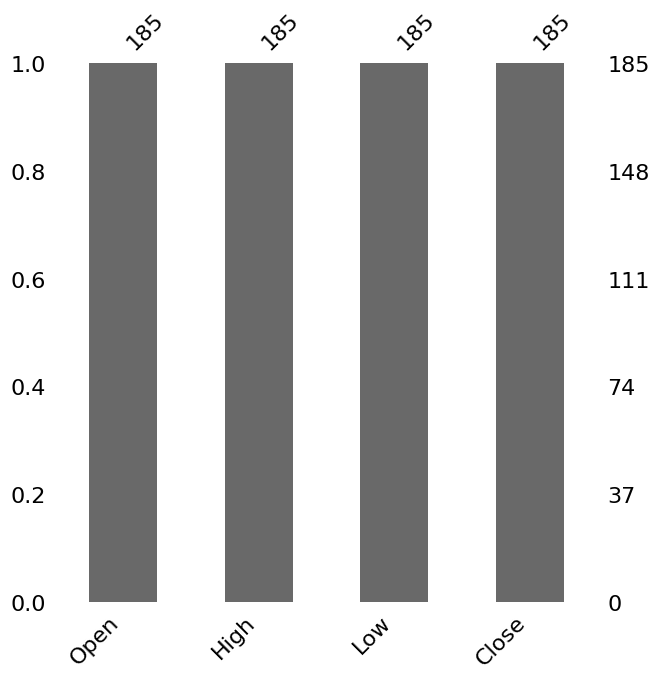

In [56]:
# visulization of Missing values
msno.bar(stock_df,figsize=(7,7))

As we see above graph Missing values are not available

# **Outlier Detection**

<Axes: >

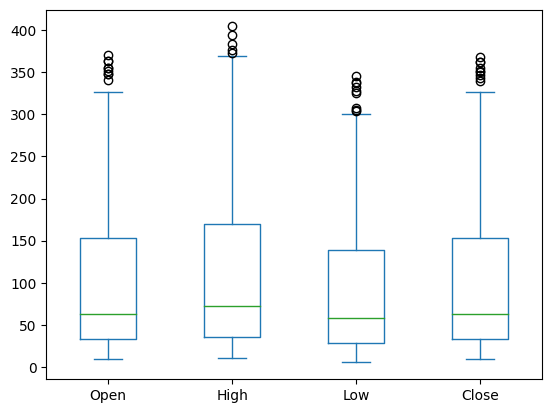

In [57]:
#outlier detection
stock_df[['Open','High','Low','Close']].plot(kind='box')

As we can see that some outliers present in our dataset, we will need to deal with these before proceesing data.

# **EDA**

In [59]:
# seperating independent variables and dependent variables

dependent_variables = 'Close'
independent_variables =list(set(stock_df.columns.tolist()) - {dependent_variables}-{'Date'})
print(f'Dependent Variable : {dependent_variables}')
print(f'Independent variables :{independent_variables}')

Dependent Variable : Close
Independent variables :['Open', 'High', 'Low']


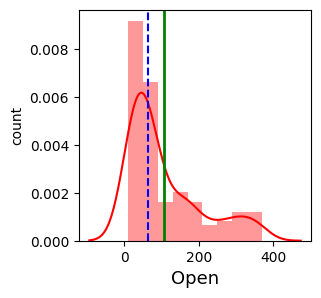

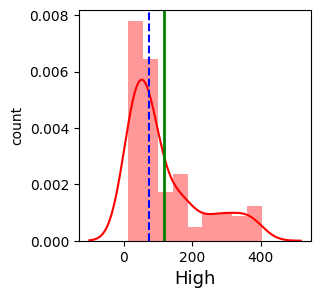

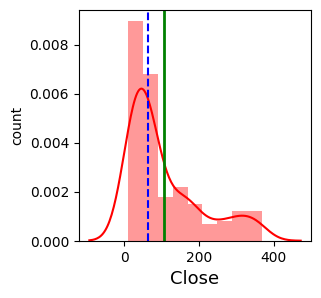

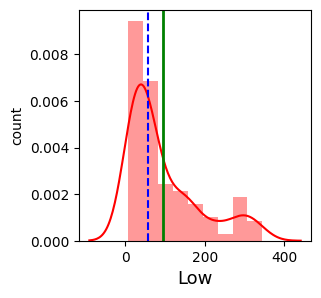

In [61]:
# plot distributions of all variables
for col in ['Open','High','Close','Low']:
  plt.figure(figsize=(3,3))
  sns.distplot(stock_df[col], color='r')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(stock_df[col].mean(),color='green',linewidth=2)   # axvline plots a vertical line at a value (mean in this case). 
  plt.axvline(stock_df[col].median(),color='blue',linestyle='dashed',linewidth=1.5)
  plt.show()

We can clearly see that these distributions are positively skewed. The mean and median are at significant distance from each other.

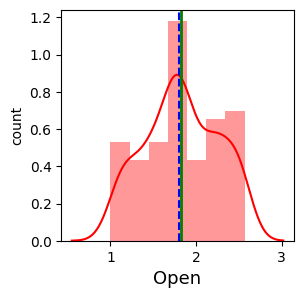

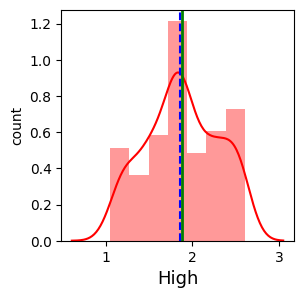

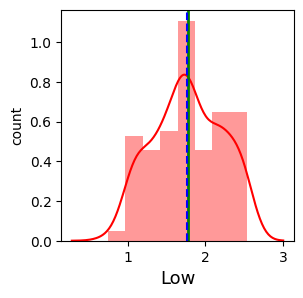

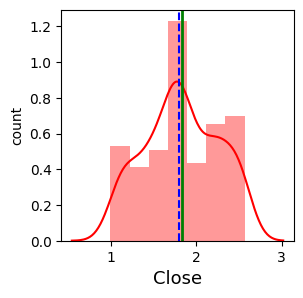

In [62]:
# Lets use log transformation on these features.
for col in ['Open','High','Low','Close']:
  plt.figure(figsize=(3,3))
  sns.distplot(np.log10(stock_df[col]), color='r')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(np.log10(stock_df[col]).mean(),color='green',linewidth=2) 
  plt.axvline(np.log10(stock_df[col]).median(),color='blue',linestyle='dashed',linewidth=1.5)
  plt.show()

Above all features are transormed in normal distribution, so our model give accurate results and improve the accuracy of our model

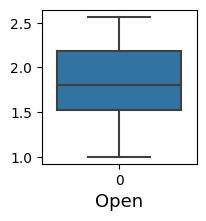

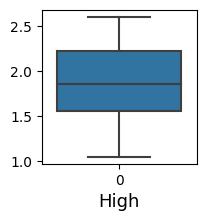

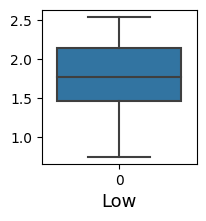

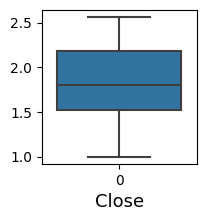

In [63]:
# detecting the outliers after transforming the features into log normal distribution
for col in ['Open','High','Low','Close']:
  plt.figure(figsize=(2,2))
  sns.boxplot(np.log10(stock_df[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

We can see that after appplying log transormation, no outliers anymore

We are working with stock data , dropping the outliers completely is not a good option , because stock price is dependent on many factors (natural disaster,Economy , Government policies , Political scenario etc.)

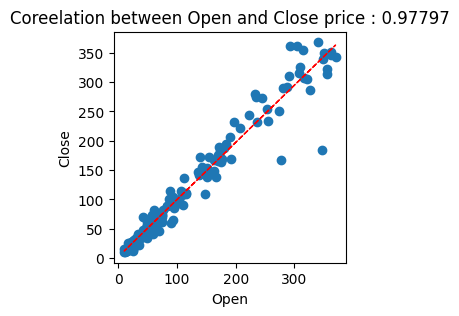

In [21]:
#Visulization of correlation between independent variable(Open) and dependent variable(Close).

fig = plt.figure(figsize=(3, 3))
ax = fig.gca()
correlation_open = stock_df['Open'].corr(stock_df['Close'])        
plt.scatter(x=stock_df['Open'],y=stock_df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title(f'Coreelation between Open and Close price : {round((correlation_open),5)}')
z = np.polyfit(stock_df['Open'], stock_df['Close'], 1)                                
y_hat = np.poly1d(z)(stock_df['Open'])

plt.plot(stock_df['Open'], y_hat, "r--", lw=1)

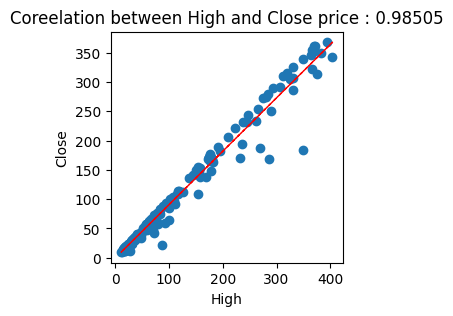

In [20]:
#Visulization of correlation between independent variable(High) and dependent variable(Close)

fig = plt.figure(figsize=(3, 3))
ax = fig.gca()
correlation_high = stock_df['High'].corr(stock_df['Close'])        
plt.scatter(x=stock_df['High'],y=stock_df['Close'])
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title(f'Coreelation between High and Close price : {round((correlation_high),5)}')
z = np.polyfit(stock_df['High'], stock_df['Close'], 1)                                
y_hat = np.poly1d(z)(stock_df['High'])

plt.plot(stock_df['High'], y_hat, "r--", lw=1)


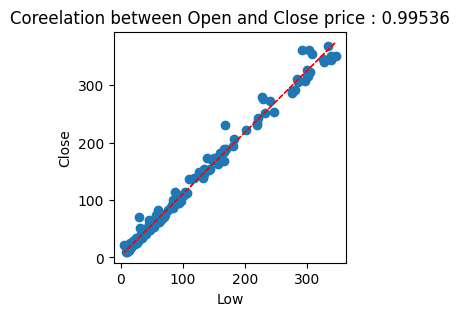

In [19]:
#Visulization of correlation between independent variable(Low) and dependent variable(Close)
fig = plt.figure(figsize=(3, 3))
ax = fig.gca()
correlation_low = stock_df['Low'].corr(stock_df['Close'])        
plt.scatter(x=stock_df['Low'],y=stock_df['Close'])
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title(f'Coreelation between Open and Close price : {round((correlation_low),5)}')
z = np.polyfit(stock_df['Low'], stock_df['Close'], 1)                                
y_hat = np.poly1d(z)(stock_df['Low'])

plt.plot(stock_df['Low'], y_hat, "r--", lw=1)

After observing all the correlations, we can say that  of our independent variables are highly correlated to the dependent variable.

And linear relationship between independent and dependent variables has been detected.

<Axes: >

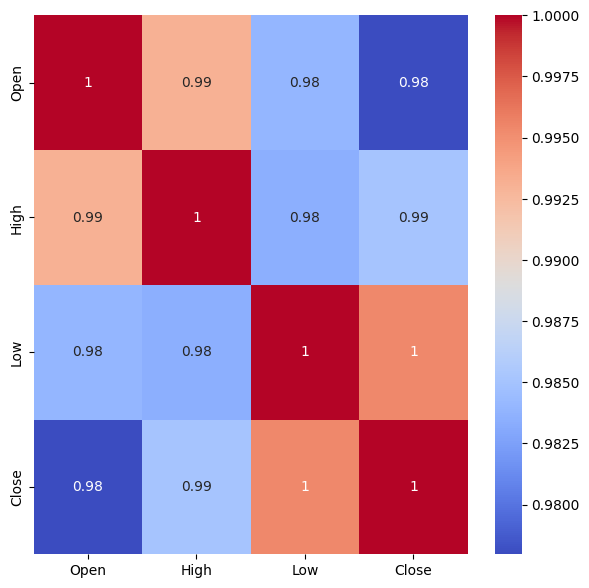

In [22]:
# visualise for the correlation among all variables using heatmap graph.
corr = stock_df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

After observing all the correlations in above heatmap, we can say that  of our independent variables are highly correlated to the dependent variable.

This causes a problem for us as high correlation among independent variables (multicollinearity) is a problem for our models.which makes it difficult to determine the individual effect of each independent variable on the dependent variable

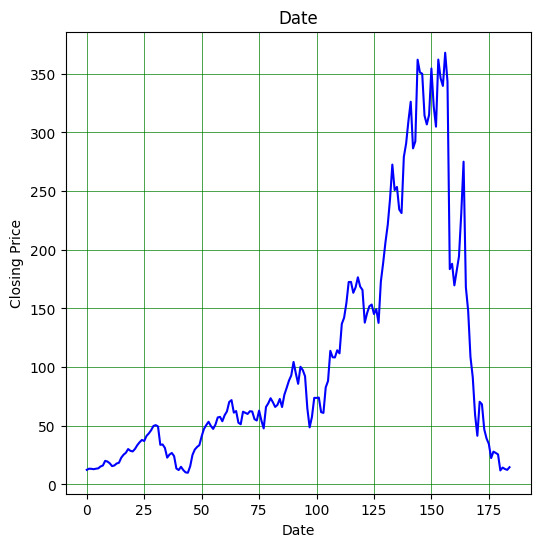

In [ ]:
#print the plot to analyze the relationship between "Closing price" and "Date" 

plt.figure(figsize=(6,6))
stock_df['Close'].plot(color = 'blue')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Date')
plt.show()

We can see that the stock price is rising up until 2018 

In August 2018, Yes Bank share was trading at over Rs 350 per share. Then, MD and CEO (Rana Kapoor) vowed to never sell even a single share. However, in November 2019, Kapoor virtually sold all his shares. Further, the bank’s financial conditions began declining and the bank was not able to raise capital to address potential loan losses and resultant downgrades, deposit withdrawals, and triggering invocation of bond covenants by investors.

# **# Data Preprocessing**

In [23]:
# data  of independent variables
x = np.log10(stock_df[independent_variables].values)

# data  of dependent variables
y = np.log10(stock_df[dependent_variables].values)

In [24]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
# For Scaling the data

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **# 1. Linear Regression Model**

In [26]:
#import some modules

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [27]:
# Creating a linera model

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [64]:
# predicting the traning and testing score 

y_pred_lm = regressor.predict(x_test)
print(f'Testing Score {regressor.score(x_test,y_test)}')
print(f'Traning Score {regressor.score(x_train ,y_train)}')


Testing Score 0.9956268809883747
Traning Score 0.9947900553430551


In [29]:
# performance matrix

print('Mean squared Error:',(mean_squared_error((10**y_test),(10**y_pred_lm))))
print('Root Mean squared Error:',math.sqrt(mean_squared_error((10**y_test),(10**y_pred_lm))))
print('Mean Absolute Error:',(mean_absolute_error((10**y_test),(10**y_pred_lm))))
print('R2 Score:',(r2_score((10**y_test),(10**y_pred_lm))))
             

Mean squared Error: 70.42040616145432
Root Mean squared Error: 8.3916867292252
Mean Absolute Error: 4.816779252269776
R2 Score: 0.9937436908107394


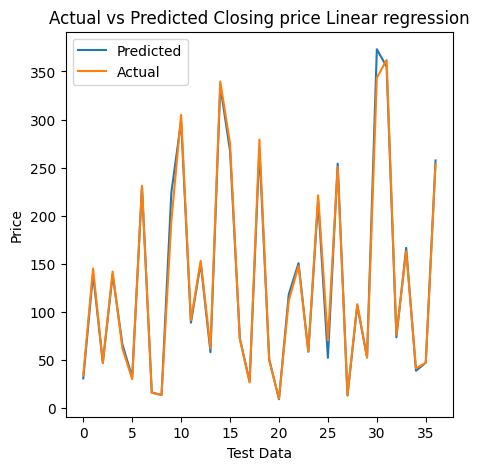

In [30]:
# visulizing the actual and predicted values of closing price

plt.figure(figsize=(5,5))
plt.plot(10**y_pred_lm)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

As we can see from above graph,Actual value and predicted values are very close in Linear regression model

# **# 2.Lasso Model With Hyperparameter Tuning**

In [32]:
#import lasso module

from sklearn.linear_model import Lasso

In [34]:
#  lasso regression with hyperparameter tuning 

LassoRegression = Lasso()
lasso_hyper_parameters = {
 'alpha': np.arange(0.001, 1.0, 0.01)
 }
LassoRegressor = GridSearchCV(LassoRegression, lasso_hyper_parameters, scoring='r2', cv=10)

LassoRegressor.fit(x_train,y_train)
y_pred_lasso = LassoRegressor.predict(x_test)

In [37]:
# Best values of parameters after hyperparameter tuning

print("Best value for alpha : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)
print(f'Testing Score:{LassoRegressor.score(x_test,y_test)}')
print(f'Traning Score:{LassoRegressor.score(x_train,y_train)}')

Best value for alpha :  {'alpha': 0.001}
Best score for cost function:  0.986781403702631
Testing Score:0.9926790006279411
Traning Score:0.9923913662437414


In [38]:
#performnace matrix of lasso regression

print('Mean squared Error:',(mean_squared_error((10**y_test),(10**y_pred_lasso))))
print('Root Mean squared Error:',math.sqrt(mean_squared_error((10**y_test),(10**y_pred_lasso))))
print('Mean Absolute Error:',(mean_absolute_error((10**y_test),(10**y_pred_lasso))))
print('R2 Score:',(r2_score((10**y_test),(10**y_pred_lasso))))

Mean squared Error: 105.87546977144589
Root Mean squared Error: 10.289580641184843
Mean Absolute Error: 5.870771335093686
R2 Score: 0.9905937822492857


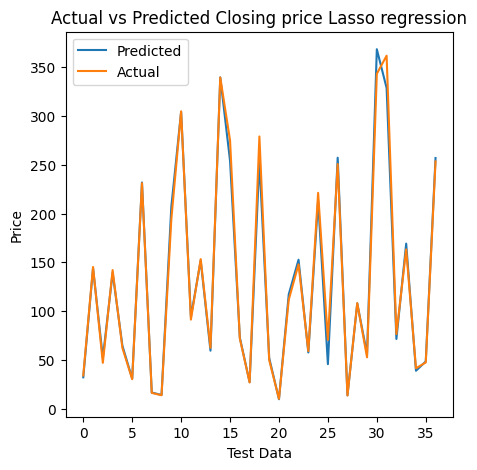

In [39]:
#visulize actual and predicted value of closing price

plt.figure(figsize=(5,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")
plt.show()

As we can see from above graph,Actual value and predicted values are very close in Lasso regression model

## **3.Ridge Model With Crossvalidation**

In [31]:
#import ridge model

from sklearn.linear_model import Ridge

In [66]:
# ridge model with hyperparameter tuning

RidgeRegression = Ridge()
Ridge_hyper_parameters = {
 'alpha': np.arange(0.01, 1.0, 0.03)
 }
RidgeRegressor = GridSearchCV(RidgeRegression, Ridge_hyper_parameters, scoring='r2', cv=10)
RidgeRegressor.fit(x_train,y_train)
y_pred_Ridge = RidgeRegressor.predict(x_test)

In [68]:
# best values of parameter after hyperparameter tuning

print("Best value for alpha : ",RidgeRegressor.best_params_)
print("Best score for cost function: ", RidgeRegressor.best_score_)
print(f'Testing Score:{RidgeRegressor.score(x_test,y_test)}')
print(f'Traning Score:{RidgeRegressor.score(x_train,y_train)}')

Best value for alpha :  {'alpha': 0.01}
Best score for cost function:  0.9911919484803773
Testing Score:0.9956043786847031
Traning Score:0.9947892222245419


In [69]:
#performnace matrix of Ridge regression

print('Mean squared Error:',(mean_squared_error((10**y_test),(10**y_pred_Ridge))))
print('Root Mean squared Error:',math.sqrt(mean_squared_error((10**y_test),(10**y_pred_Ridge))))
print('Mean Absolute Error:',(mean_absolute_error((10**y_test),(10**y_pred_Ridge))))
print('R2 Score:',(r2_score((10**y_test),(10**y_pred_Ridge))))

Mean squared Error: 70.2640891491631
Root Mean squared Error: 8.382367753156807
Mean Absolute Error: 4.833449513142428
R2 Score: 0.9937575783699534


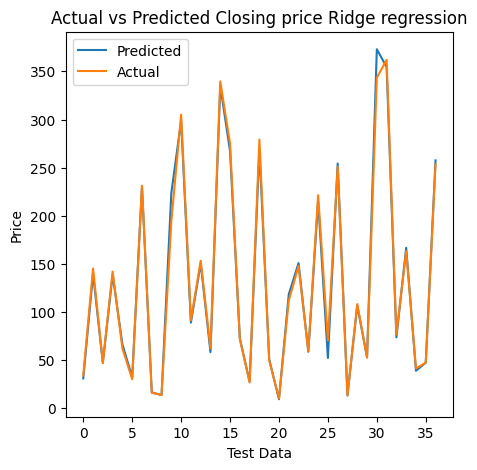

In [ ]:
#visulize actual and predicted value of closing price

plt.figure(figsize=(5,5))
plt.plot(10**y_pred_Ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")
plt.show()

As we can see from above graph,Actual value and predicted values are very close in Ridge regression model

# **4.Elastic-Net Model With Hyperparameter Tuning**

In [70]:
#import elasticnet module

from sklearn.linear_model import ElasticNet

In [71]:
# Hyperparameter tuning in elasticnet model

elasticnet_model = ElasticNet()
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}


elasticnetRegressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='r2',cv=10)
elasticnetRegressor.fit(x_train, y_train)
y_pred_elasticnet = elasticnetRegressor.predict(x_test)

In [72]:
#best parameter value after hyperparameter tuning

print("Best value for alpha : ",elasticnetRegressor.best_params_)
print("Best score for cost function: ", elasticnetRegressor.best_score_)
print(f'Testing Score:{elasticnetRegressor.score(x_test,y_test)}')
print(f'Traning Score:{elasticnetRegressor.score(x_train,y_train)}')

Best value for alpha :  {'alpha': 1e-05, 'l1_ratio': 0.2}
Best score for cost function:  0.991209998502053
Testing Score:0.9956217587528837
Traning Score:0.9947900090013011


In [73]:
#performnace matrix of Elastic-Net regression

print('Mean squared Error:',(mean_squared_error((10**y_test),(10**y_pred_elasticnet))))
print('Root Mean squared Error:',math.sqrt(mean_squared_error((10**y_test),(10**y_pred_elasticnet))))
print('Mean Absolute Error:',(mean_absolute_error((10**y_test),(10**y_pred_elasticnet))))
print('R2 Score:',(r2_score((10**y_test),(10**y_pred_elasticnet))))

Mean squared Error: 70.38167482858748
Root Mean squared Error: 8.389378691451917
Mean Absolute Error: 4.8205909193123615
R2 Score: 0.9937471317905198


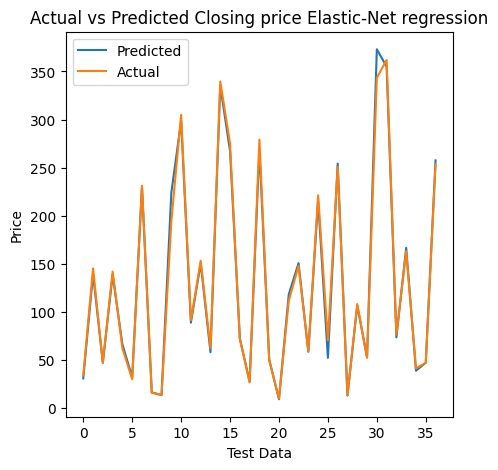

In [74]:
#visulize actual and predicted value of closing price

plt.figure(figsize=(5,5))
plt.plot(10**y_pred_elasticnet)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic-Net regression")
plt.show()

As we can see from above graph,Actual value and predicted values are very close in Elastic-net model

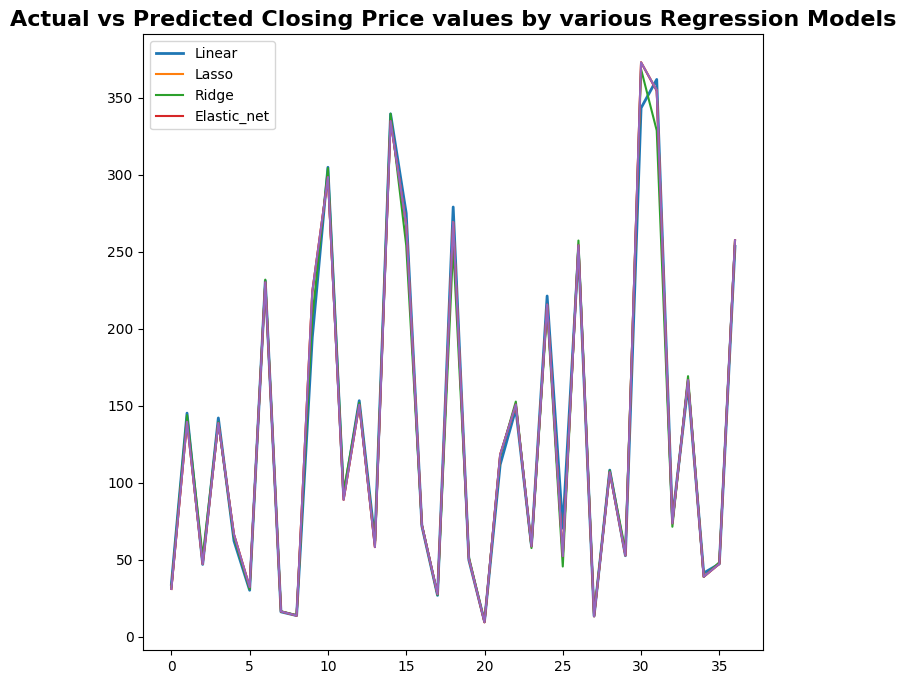

In [75]:
# Visulize the predicted values of all the models against the true values.

plt.figure(figsize=(8,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_lm)
plt.plot(10**y_pred_lasso)
plt.plot(10**y_pred_Ridge)
plt.plot(10**y_pred_elasticnet)
plt.legend(['Linear','Lasso','Ridge','Elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Regression Models', weight = 'bold',fontsize=16)
plt.show()
     


As we can see from above graph, all of our models are performing really well and are able to closely approximate the actual values

In [76]:
# Actual and predicted value of closing price using linear regression

dframe_regressor = pd.DataFrame(y_test,y_pred_lm)
dfr_regressor = pd.DataFrame({'Actual':y_test,'Linear Regression predicted values ':y_pred_lm})
dfr_regressor

,Actual,Linear Regression predicted values
0,1.532245,1.491225
1,2.162056,2.144654
2,1.671636,1.673942
3,2.152533,2.142269
4,1.793930,1.822014
5,1.479431,1.507948
6,2.364101,2.362038
7,1.207365,1.215453
8,1.137037,1.137143
9,2.288473,2.350444


# **Conclusion:**


* We uses regressive model to predict the future price of a stock. The model is 
very popular and we investigate in predicting the stock prices very accurately.

* Some outliers present in our dataset,however dataset is small so dropping the outliers will lead to loss some information

* All histogram plot shows that all are right skewed and with the help of log transormation converted into normal distribution

* Stock closing price is decreased after year 2018 ,beacuse of Rana Kapoor case

* After the year 2018,stock price falls down , it is not benificial for investors to invest their money.

* From heatmap graph we conclude that all independent and dependent features highly correlated with each other

* We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well 

* All of the implemented models performed quite well on our data giving us the  R-square of over 99%.

* Today the stock price prediction has become very complex than before as stock prices are not only affected due to company’s financial status but also due to economical condition of the country, political atmosphere and natural disasters etc.